The objective of this notebook is to show how to read and plot the trajectory and the temperature measured by a drifting buoy.

In [91]:
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap

# Data reading

The data file is located in the *datafiles* directory.

In [92]:
datadir = './datafiles/'
datafile = 'GL_TS_DC_2300691.nc'

We extract only the spatial coordinates:

In [93]:
with netCDF4.Dataset(datadir + datafile) as nc:
    lon = nc.variables['LONGITUDE'][:]
    lat = nc.variables['LATITUDE'][:]

# Basic plot

Before starting the plots, we set the font size to 16:

In [94]:
mpl.rcParams.update({'font.size': 16})

We will also indicate *Start* and *End* labels at the corresponding locations.

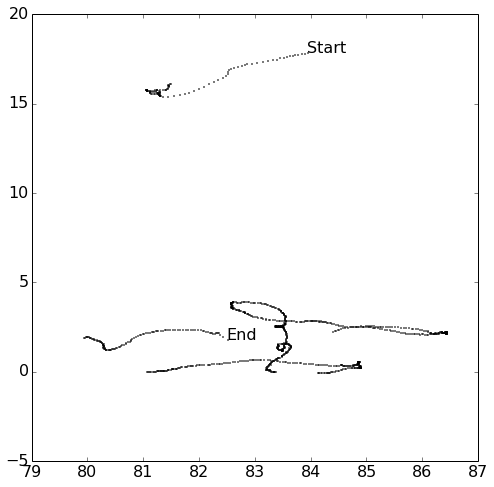

In [95]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(lon, lat, 'ko', ms=1)
plt.text(lon[0], lat[0], 'Start', fontsize=16)
plt.text(lon[-1], lat[-1], 'End', fontsize=16)
plt.show()

The figure can be improved by adding the landmask and coastline.

# Plot on a map

The first thing to do is to create a projection using basemap. We can obtain the bounding box from the previous plot:

In [52]:
lonmin, lonmax = ax.get_xlim()
latmin, latmax = ax.get_ylim()

then we create the projection, slightly enlarging the longitude extension:

In [96]:
m = Basemap(projection='merc', llcrnrlat=latmin, urcrnrlat=latmax,
            llcrnrlon=lonmin-5, urcrnrlon=lonmax+5, lat_ts=20, resolution='i')

The new figure is generated similarly to the previous one:

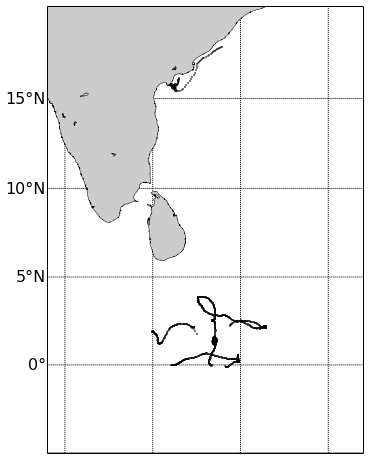

In [97]:
lon2, lat2 = m(lon, lat)
fig = plt.figure(figsize=(8,8))
m.plot(lon2, lat2, 'ko', ms=1)

m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)

m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,1,0,0], zorder=1)
plt.show()

# Scatter plot

If the platforms also measures the temperature, we can create a [scatter plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) (the color of the dot on the map depends on the measured temperature).<br/>
The temperature variable is loaded the same way as for the coordinates.

In [67]:
with netCDF4.Dataset(datadir + datafile) as nc:
    temperature = nc.variables['TEMP'][:,1]
    print temperature.shape

(1021,)


For the plot, we will keep the same projection.<br/>
We also have to set the colormap.

In [86]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=26, vmax=29)

We specify the coordinates and the temperature as the arguments of the scatter plot:
* s=10 indicate the size of the dots,
* c=temperature indicates which variable is used as the z-dimension (color)
* edgecolor='None' means that no color is applied around the edge of the marker
* cmap=cmap sets the colormap to cmap, defined before and
* norm=norm sets the limits for the color scale.

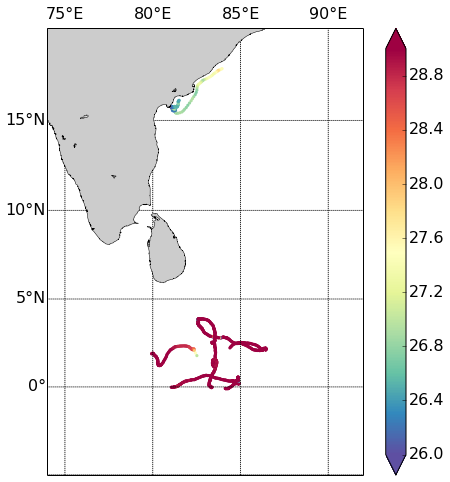

In [90]:
fig = plt.figure(figsize=(8,8))
m.scatter(lon2, lat2, s=10, c=temperature, edgecolor='None', cmap=cmap, norm=norm)
m.drawcoastlines(linewidth=0.5, zorder=3)
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,5.), labels=[1,0,0,0], zorder=1)
m.drawmeridians(np.arange(-180.,181.,5.), labels=[0,0,1,0], zorder=1)
plt.colorbar(extend='both', cmap=cmap, norm=norm)
plt.show()

The temperature values measured close to the Equator are higher than those measured along the coast.